In [1]:
import pandas as pd
import json

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

large = 22; med = 14; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (12, 7),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)

In [2]:
with open('all_idioms.json', 'r', encoding='UTF-8') as f:
    data = tuple(json.load(f))

abbrs = {'презрит', 'эвф', 'груб', 'шутл-ирон', 'инф', 'ит', 'вульг', 'грубо-прост', 'канц', 'фр', 'мор', 'бран', 'поэт', 'устар', 'неодобрит', 'высок', 'одобр', 'шутл-фамильярн', 'этногр', 'ритор', 'книжн', 'восторж', 'этикет ф', 'посл', 'прост', 'библ', 'жарг', 'обл', 'шахм', 'офиц', 'миф', 'погов', 'юр', 'лит', 'доревол', 'перен', 'нов', 'фольк', 'спец', 'предосуд', 'еванг', 'лат', 'публиц', 'торж', 'греч', 'греч миф', 'спорт', 'англ', 'араб', 'ист', 'воен', 'др-греч', 'уничиж', 'пренебр', 'нем', 'пориц', 'разг', 'фам', 'экспрес', 'физ', 'театр', 'народно-поэт', 'церк-слав', 'охот', 'детск', 'иpoн', 'церк', 'шутл', 'филос', 'рел'}
len(abbrs)

70

In [3]:
abbrs = sorted(list(abbrs))

In [4]:
df = pd.DataFrame(columns=['phrase', 'meaning', 'dictionary'] + sorted(list(abbrs)))
for phrase_dict in data:
    semantics_set = phrase_dict['semantics']
    for meaning_dict in semantics_set:
        if 'abbr' in list(meaning_dict.keys()) and 'dictionary' in list(meaning_dict.keys()):
            df.loc[len(df)] = [phrase_dict['phrase'],
                               meaning_dict['meaning'],
                               meaning_dict['dictionary']] + [True if abbr in meaning_dict['abbr'] else False for abbr in abbrs]

In [5]:
df.head(10)

,phrase,meaning,dictionary,англ,араб,библ,бран,воен,восторж,вульг,...,церк-слав,шахм,шутл,шутл-ирон,шутл-фамильярн,эвф,экспрес,этикет ф,этногр,юр
0,"[а вот на тебе!, и вот на тебе!]","Выражение удивления, разочарования и т. п.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,[а был ли мальчик?],"Было ли что-либо в действительности, на самом ...",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,[а был ли мальчик?],"выражение сомнения в том, что что-то произошл...",Fedosov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,[а вот],"Напротив, наоборот.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"[а вот и нет, вот и нет]","Не выходит, нельзя сделать то, что намечается,...",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,[а ларчик просто открывался (открывается)],"Дело ясно, не требует долгих размышлений.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,"[а не то, не то]","Иначе, в противном случае.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,"[а не то, не то]","Либо, или же.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,"[а не то, не то]","в противном случае, иначе",Fedosov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,"[а поди ж ты, поди ж ты]","Выражение изумления, восхищения, недоумения и ...",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [6]:
# распределение фраз по количеству помет
#create a column with a tuple of all idiom's labels
row_labels = []
label_combinations = []
for ind, row in df.loc[:, 'англ': 'юр'].iterrows():
    row_labels.append(len(row[row].index))
    label_combinations.append(tuple(row[row].index))

df['label_counts'] = row_labels
df['label_combinations'] = label_combinations

In [7]:
df.head(10)

,phrase,meaning,dictionary,англ,араб,библ,бран,воен,восторж,вульг,...,шутл,шутл-ирон,шутл-фамильярн,эвф,экспрес,этикет ф,этногр,юр,label_counts,label_combinations
0,"[а вот на тебе!, и вот на тебе!]","Выражение удивления, разочарования и т. п.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"(разг, экспрес)"
1,[а был ли мальчик?],"Было ли что-либо в действительности, на самом ...",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"(разг, экспрес)"
2,[а был ли мальчик?],"выражение сомнения в том, что что-то произошл...",Fedosov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,()
3,[а вот],"Напротив, наоборот.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"(разг,)"
4,"[а вот и нет, вот и нет]","Не выходит, нельзя сделать то, что намечается,...",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"(разг, экспрес)"
5,[а ларчик просто открывался (открывается)],"Дело ясно, не требует долгих размышлений.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"(иpoн,)"
6,"[а не то, не то]","Иначе, в противном случае.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"(прост,)"
7,"[а не то, не то]","Либо, или же.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"(прост,)"
8,"[а не то, не то]","в противном случае, иначе",Fedosov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,()
9,"[а поди ж ты, поди ж ты]","Выражение изумления, восхищения, недоумения и ...",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"(прост, экспрес)"


In [8]:
df.to_csv('dataframe.csv', sep=',', encoding='utf-8')

In [9]:
df_default = pd.read_csv('dataframe.csv', sep=',')

In [10]:
del df_default['Unnamed: 0']

In [11]:
phrase_one = df_default['phrase'].unique()
df = df_default[df_default['phrase'].isin(phrase_one)]

In [12]:
len(df['phrase'].unique())

20727

In [13]:
description = df.describe()
description

,label_counts
count,32747.000000
mean,0.925306
std,0.825214
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [14]:
df

,phrase,meaning,dictionary,англ,араб,библ,бран,воен,восторж,вульг,...,шутл,шутл-ирон,шутл-фамильярн,эвф,экспрес,этикет ф,этногр,юр,label_counts,label_combinations
0,"['а вот на тебе!', 'и вот на тебе!']","Выражение удивления, разочарования и т. п.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"('разг', 'экспрес')"
1,['а был ли мальчик?'],"Было ли что-либо в действительности, на самом ...",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"('разг', 'экспрес')"
2,['а был ли мальчик?'],"выражение сомнения в том, что что-то произошл...",Fedosov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,()
3,['а вот'],"Напротив, наоборот.",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"('разг',)"
4,"['а вот и нет', 'вот и нет']","Не выходит, нельзя сделать то, что намечается,...",Fedorov,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,"('разг', 'экспрес')"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32742,['Хорошо привешенный или подвешенный языку кого'],"о человеке, к-рый бойко, плавно, хорошо говорит.",Volkova,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,()
32743,['Язык не повернётся сказать'],нет решимости сказать.,Volkova,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0,()
32744,"['Языком трепать (чесать, болтать, молоть)']","говорить (зря, без толку, для препровождения в...",Volkova,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"('разг',)"
32745,['Язык чесать'],"говорить зря, без толку, для препровождения вр...",Volkova,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,"('разг',)"


In [15]:
pd.crosstab(df['phrase'], df['dictionary']).sum()

dictionary
Fedorov        11697
Fedosov         6947
Kveselevich     8337
Myurrey          957
Volkova         4809
dtype: int64

<AxesSubplot:title={'center':'Объем словарей'}>

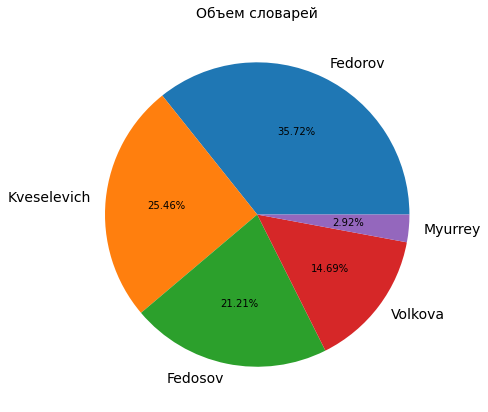

In [16]:
# Количество помет в каждом из словарей
def autopct(pct): 
    return '%.2f' % pct + '%'


pd.crosstab(df['phrase'], df['dictionary']).sum().sort_values(ascending=False).plot(kind='pie',
                                                       rot=0,
                                                      title='Объем словарей',
                                                      ylabel='',
                                                      autopct=autopct)

In [25]:
# количество каждой из помет
labels_count = {}
for col in abbrs:
    if len(df[df[col]==True]) > 800:
        labels_count[len(df[df[col]==True])] = col
        print(col, len(df[df[col]==True]))

иpoн 1305
книжн 1126
неодобрит 896
прост 5371
разг 8005
устар 3254
экспрес 5218


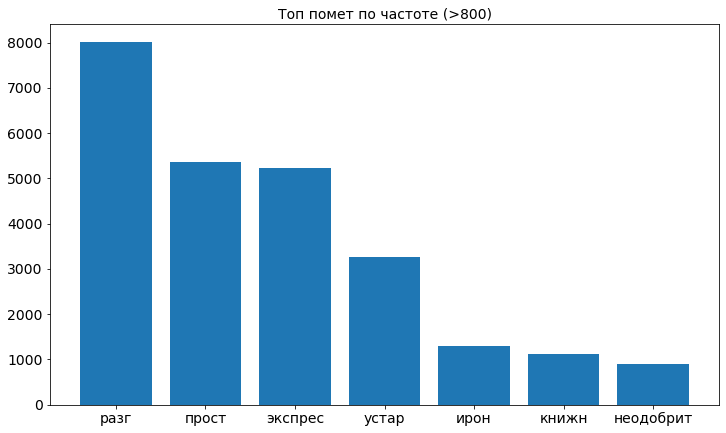

In [26]:
#plt.figure(figsize=(10, 7))

labels_count_keys = sorted(list(labels_count.keys()), reverse=True)
labels_count_values = [labels_count[k] for k in labels_count_keys]

plt.bar(labels_count_values, labels_count_keys)
plt.title('Топ помет по частоте (>800)')
plt.show()

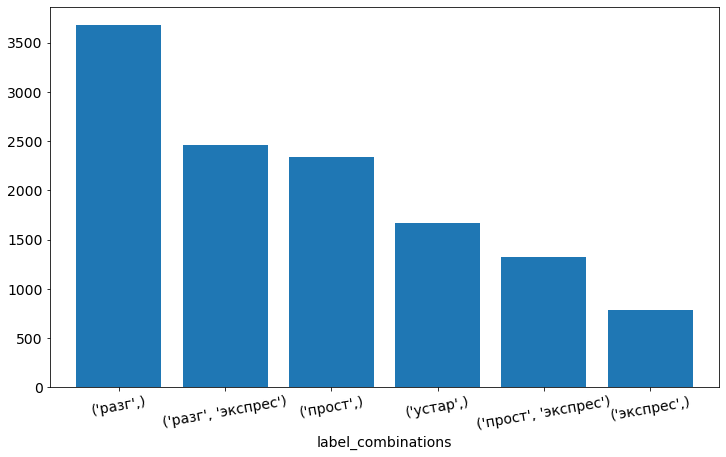

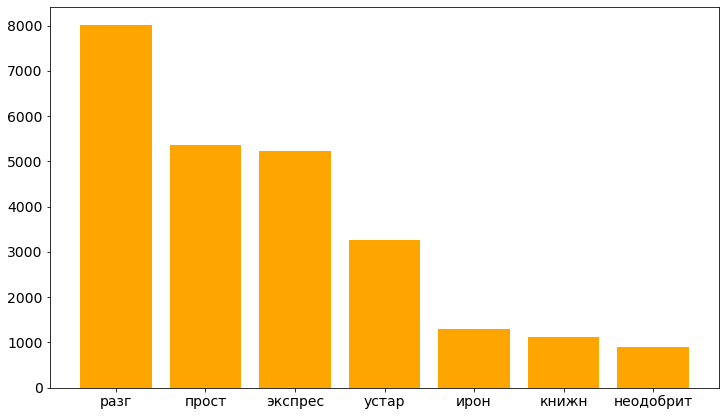

In [29]:
pd.crosstab(df['dictionary'], df['label_combinations']).sum().nlargest(7, keep='all')[1:].plot(kind='bar',
                                                                                            rot=10,
                                                                                            figsize=(12, 7),
                                                                                             width=0.8)
plt.show()

plt.bar(labels_count_values, labels_count_keys, color='orange')
plt.show()

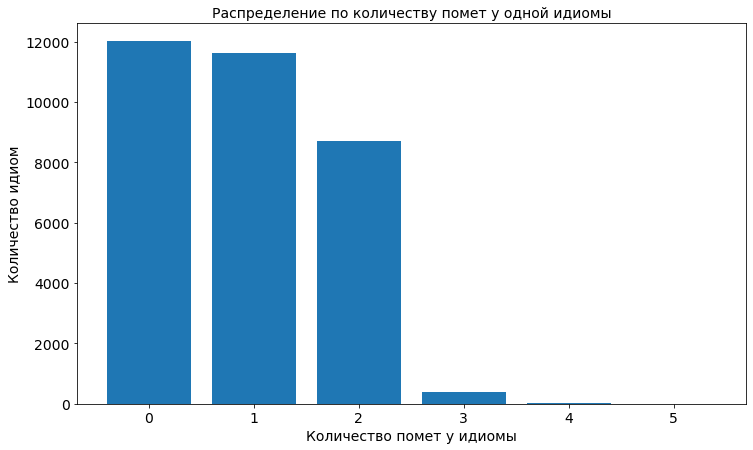

In [20]:
unique_label_counts = list(set(row_labels))
plt.bar(unique_label_counts, [row_labels.count(label_count) for label_count in unique_label_counts])
plt.xlabel('Количество помет у идиомы')
plt.ylabel('Количество идиом')
plt.title('Распределение по количеству помет у одной идиомы')
plt.show()

In [21]:
df[df['label_counts'] == 5]

,phrase,meaning,dictionary,англ,араб,библ,бран,воен,восторж,вульг,...,шутл,шутл-ирон,шутл-фамильярн,эвф,экспрес,этикет ф,этногр,юр,label_counts,label_combinations
29693,['яко тать в нощи'],NaN,Kveselevich,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,5,"('библ', 'иpoн', 'устар', 'церк', 'церк-слав')"


In [22]:
dicts = df['dictionary'].unique()

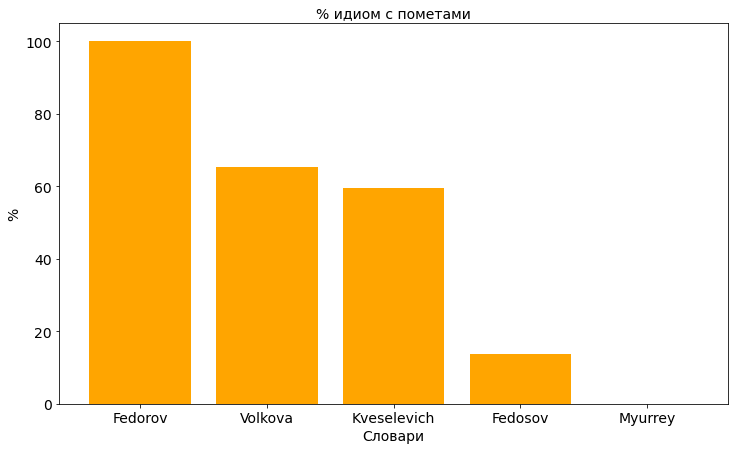

In [23]:
by_dictionary = df.groupby('dictionary')
labels_percent = {}
for dictionary in dicts:
    dict_group = by_dictionary.get_group(dictionary)
    total = len(dict_group)
    with_labels = len(dict_group['label_counts'][dict_group['label_counts'] > 0])
    
    labels_percent[round(with_labels / total * 100, 3)] = dictionary
    
labels_percent_keys = sorted(list(labels_percent.keys()), reverse=True)
labels_percent_values = [labels_percent[k] for k in labels_percent_keys]

plt.bar(labels_percent_values, labels_percent_keys, color='orange')
plt.xlabel('Словари')
plt.ylabel('%')
plt.title('% идиом с пометами')

plt.show()

In [24]:
dicts_group = df.groupby('dictionary').apply(lambda x: sum(x['label_counts']) / len (x))
print('Среднее количество помет на одну идиому по словарям')
print(dicts_group)

Среднее количество помет на одну идиому по словарям
dictionary
Fedorov        1.575276
Fedosov        0.146106
Kveselevich    0.786134
Myurrey        0.000000
Volkova        0.895404
dtype: float64
